# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
import seaborn as sns
from pytrends.request import TrendReq

# Get The Trending Keywords

In [2]:
# Init pytrend
pytrend = TrendReq()
# Get google top charts
top_charts = pytrend.top_charts(2020, geo='ID')
# Add another trending keywords (kategori penulusuran terpopuler & Berita)
list_keyword = top_charts.iloc[:,0].tolist()
for i in ["Kartu Pra Kerja", "UMKM Online", "Stimulus PLN",
          "Omnibus Law", "Sunda Empire", "COVID-19", "Erupsi Krakatau",
          "Uang 75 Ribu", "Banjir Jakarta","Sepeda Lipat",
          "Hand Sanitizer", "Odading", "Glenn Fredly", "Lagu Lathi", "Google Classroom"]:
    list_keyword.append(i) 

# Get The Number of Google Searches

In [3]:
dataset = []
for x in range(0,len(list_keyword)):
    keywords = [list_keyword[x]]
    pytrend.build_payload(kw_list=keywords,
                          cat=0,
                          timeframe='2020-01-01 2020-12-18', # dari 1 januari sampai 18 desember 2020
                          geo='ID')
    data = pytrend.interest_over_time()
    if not data.empty:
        data = data.drop(labels=['isPartial'],axis='columns')
        dataset.append(data)
result = pd.concat(dataset, axis=1).T
result.head()

date,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2020-10-11,2020-10-18,2020-10-25,2020-11-01,2020-11-08,2020-11-15,2020-11-22,2020-11-29,2020-12-06,2020-12-13
Ghosting,3,3,2,2,3,5,15,7,6,12,...,23,27,37,28,26,38,42,46,55,100
Gabut,42,35,42,42,42,38,40,32,37,37,...,31,37,32,29,33,37,29,28,30,35
Lockdown,0,0,0,0,0,0,0,0,0,18,...,1,0,1,1,1,1,1,1,2,3
Rebahan,86,65,51,46,43,42,64,55,52,54,...,33,35,35,29,34,28,37,32,30,32
WFH,0,0,0,0,0,0,0,0,0,4,...,5,6,6,7,5,5,5,5,6,10


# Sort The Data

In [4]:
max_val_ind = []
for i in list_keyword:
    max_val_ind.append(result.loc[i,:].tolist().index(max(result.loc[i,:].tolist())))
result.insert(0, "Index of Biggest Value", max_val_ind, True)
result = result.sort_values("Index of Biggest Value")
# ngerapiin df
del result["Index of Biggest Value"]
result.columns.name = None

# Viz

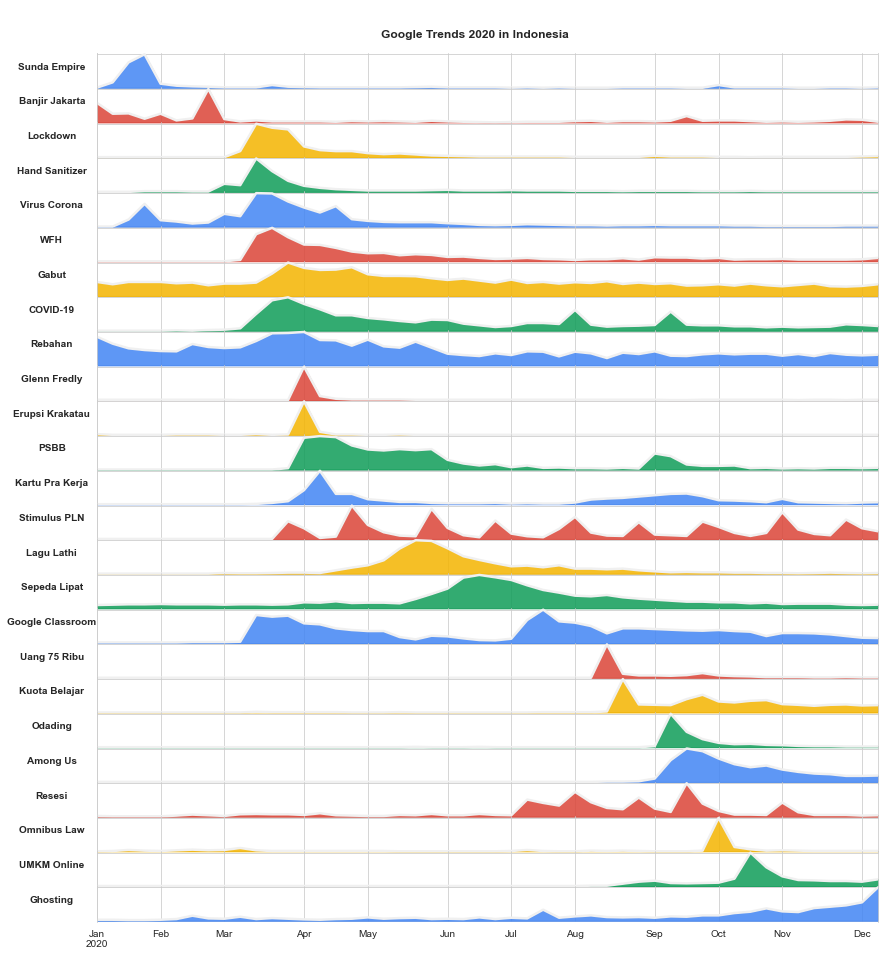

In [5]:
# grid style
sns.set_style("whitegrid")
# 26 warna buat masing2 item
colors = 6*['#4285F4', '#DB4437', '#F4B400', '#0F9D58'] + ['#4285F4', '#DB4437'] 
# define the canvas
gs = (grid_spec.GridSpec(len(list_keyword),1))
fig = plt.figure(figsize=(14,16))
# iterating the items
i = 0
ax_objs = []
for kywrd in result.index.tolist():
    # creating new axes object and appending to ax_objs
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))
    # plotting the distribution
    plot = (result.loc[kywrd,:].plot(color="#f0f0f0",linewidth=2.5))
    # grabbing x and y data from the kde plot
    x = plot.get_children()[0]._x
    y = plot.get_children()[0]._y
    # filling the space beneath the distribution
    ax_objs[-1].fill_between(x,y,color=colors[i], alpha=0.85)
    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)
    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_ylabel(kywrd,rotation=0, labelpad= 38, fontweight='bold')
    if i == len(result.index.tolist())-1:
        pass
    else:
        ax_objs[-1].set_xticklabels([])
    # remove the spines
    spines = ["top","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)
    i += 1
# adding space between the items
gs.update(hspace=-0.055)
# title
plt.suptitle("\n\nGoogle Trends 2020 in Indonesia", y=0.92, fontweight='bold')
#plt.savefig('GglTrenIndo.png', bbox_inches='tight') # save figure
plt.show()

# References

- https://www.honchosearch.com/blog/seo/how-to-use-python-pytrends-to-automate-google-trends-data/
- https://github.com/GeneralMills/pytrends#trending-searches
- https://trends.google.com/trends/yis/2020/ID/
- https://twitter.com/tunguz/status/1338905596591042562
- https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/